# CS429 - Lab 5: K-means clustering
## Visualization

In [1]:
import matplotlib.pylab as plt
from matplotlib import cm
import numpy as np
import math

In [2]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("yarn").setAppName("Lab 4")
sc = SparkContext.getOrCreate(conf=conf)

In [3]:
sc

<SparkContext master=yarn appName=Lab 4>

In [4]:
data = sc.textFile("points.txt")
data.collect()

['    664159    550946',
 '    665845    557965',
 '    597173    575538',
 '    618600    551446',
 '    635690    608046',
 '    588100    557588',
 '    582015    546191',
 '    604678    574577',
 '    572029    518313',
 '    604737    574591',
 '    577728    587566',
 '    602013    574722',
 '    627968    574625',
 '    607269    536961',
 '    603145    574795',
 '    671919    571761',
 '    612184    570393',
 '    600032    575310',
 '    627912    593892',
 '    601967    604428',
 '    591851    569051',
 '    601444    572693',
 '    629718    558104',
 '    661430    603567',
 '    597551    556737',
 '    601182    582584',
 '    562704    570596',
 '    605107    563429',
 '    607214    575069',
 '    568824    570203',
 '    612485    518009',
 '    589244    573777',
 '    625579    551084',
 '    560237    500154',
 '    626224    569687',
 '    610666    551701',
 '    597428    569940',
 '    600582    599535',
 '    604168    555003',
 '    613871    550423',


In [5]:
points = data.map(lambda x: x.rsplit()).zipWithIndex().map(lambda x: (x[1], int(x[0][0]), int(x[0][1])))
points.collect()

[(0, 664159, 550946),
 (1, 665845, 557965),
 (2, 597173, 575538),
 (3, 618600, 551446),
 (4, 635690, 608046),
 (5, 588100, 557588),
 (6, 582015, 546191),
 (7, 604678, 574577),
 (8, 572029, 518313),
 (9, 604737, 574591),
 (10, 577728, 587566),
 (11, 602013, 574722),
 (12, 627968, 574625),
 (13, 607269, 536961),
 (14, 603145, 574795),
 (15, 671919, 571761),
 (16, 612184, 570393),
 (17, 600032, 575310),
 (18, 627912, 593892),
 (19, 601967, 604428),
 (20, 591851, 569051),
 (21, 601444, 572693),
 (22, 629718, 558104),
 (23, 661430, 603567),
 (24, 597551, 556737),
 (25, 601182, 582584),
 (26, 562704, 570596),
 (27, 605107, 563429),
 (28, 607214, 575069),
 (29, 568824, 570203),
 (30, 612485, 518009),
 (31, 589244, 573777),
 (32, 625579, 551084),
 (33, 560237, 500154),
 (34, 626224, 569687),
 (35, 610666, 551701),
 (36, 597428, 569940),
 (37, 600582, 599535),
 (38, 604168, 555003),
 (39, 613871, 550423),
 (40, 617310, 551945),
 (41, 625728, 579460),
 (42, 606300, 566708),
 (43, 638559, 558807)

In [6]:
def distance(point, centroid):
    square_distance = (point[0] - centroid[0])**2 + (point[1] - centroid[1])**2
    return math.sqrt(square_distance) 

In [7]:
def argmin(point, centroids):
    cluster_index = 0
    nearest_distance = 0;
    
    for i in range(0, k):
        centroid = centroids[i]
        length = distance(point, centroid)
        if nearest_distance == 0 or nearest_distance > length:
            nearest_distance = length
            cluster_index = i
    return cluster_index

In [15]:
# let n be number of points in dataset
n = points.map(lambda x: 1).reduce(lambda x, y: x+y)
print(n)

# let k be number of clusters
k = 15

# initialzie clusters and centroids (cluster: i (for ith point in dataset), centroids: (x, y))
clusters = []
centroids = []
for i in range(0, k):
    random_index = 0
    while True:
        random_index = np.random.randint(0, n)
        if random_index not in clusters:
            break
    point = points.filter(lambda x: x[0] == random_index).collect()[0]
    clusters.append(random_index)
    centroids.append((point[1], point[2]))

# initialize k centroids (i, centroid_x, centroid_y

5000


In [16]:
clusters

[3996,
 1864,
 3339,
 2836,
 4296,
 530,
 4398,
 4912,
 1717,
 1025,
 817,
 4259,
 476,
 4589,
 3690]

In [17]:
centroids

[(401240, 354085),
 (336974, 563207),
 (140164, 531093),
 (223732, 826580),
 (372424, 413163),
 (803405, 317316),
 (865081, 551012),
 (656834, 885944),
 (341329, 565571),
 (799903, 784535),
 (416884, 786845),
 (376145, 414107),
 (814280, 344223),
 (912649, 498734),
 (480787, 147737)]

In [18]:
def display(order, my_array):
    print(order)
    for element in my_array:
        print(element)

In [19]:
temp = 0
isConverged = False
while isConverged is not True:
    isConverged = True
    
    temp = temp + 1
    rdd1 = points.map(lambda point: ((argmin((point[1], point[2]), centroids),), (point[1], point[2], 1)))
    rdd2 = rdd1.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1], x[2] + y[2]))
    
    sum_count = rdd2.collect()
    for s in sum_count:
        index = s[0][0]
        sum_x = s[1][0]
        sum_y = s[1][1]
        count = s[1][2]
        previous_centroid = centroids[index]
        centroids[index] = (sum_x / count, sum_y / count)
        if previous_centroid != centroids[index]:
            isConverged = False

In [26]:
# final centroid coordinates:
print("centroids: ")
for element in centroids:
    print(element)

# points with assigned cluster
print("point with assigned cluster: ")
points.map(lambda point: (argmin((point[1], point[2]), centroids), point[1], point[2])).collect()


centroids: 
(507818.3133903134, 175610.41595441595)
(337264.7629179331, 562123.3799392097)
(139395.22898550724, 558143.9420289855)
(244654.88563049852, 847642.0410557184)
(167856.14071856288, 347812.7155688623)
(827814.3603174603, 234912.37936507937)
(664700.4285714285, 585046.5178571428)
(670929.0681818182, 862765.7329545454)
(594328.6106557377, 571912.0368852459)
(823421.2507836991, 731145.2727272727)
(417799.6942675159, 787001.9936305733)
(398870.0484330484, 404924.06552706554)
(619224.6331360947, 398613.1420118343)
(859001.9101123596, 542317.7191011236)
(320602.55, 161521.85)
point with assigned cluster: 


[(6, 664159, 550946),
 (6, 665845, 557965),
 (8, 597173, 575538),
 (8, 618600, 551446),
 (6, 635690, 608046),
 (8, 588100, 557588),
 (8, 582015, 546191),
 (8, 604678, 574577),
 (8, 572029, 518313),
 (8, 604737, 574591),
 (8, 577728, 587566),
 (8, 602013, 574722),
 (8, 627968, 574625),
 (8, 607269, 536961),
 (8, 603145, 574795),
 (6, 671919, 571761),
 (8, 612184, 570393),
 (8, 600032, 575310),
 (6, 627912, 593892),
 (8, 601967, 604428),
 (8, 591851, 569051),
 (8, 601444, 572693),
 (8, 629718, 558104),
 (6, 661430, 603567),
 (8, 597551, 556737),
 (8, 601182, 582584),
 (8, 562704, 570596),
 (8, 605107, 563429),
 (8, 607214, 575069),
 (8, 568824, 570203),
 (8, 612485, 518009),
 (8, 589244, 573777),
 (8, 625579, 551084),
 (8, 560237, 500154),
 (8, 626224, 569687),
 (8, 610666, 551701),
 (8, 597428, 569940),
 (8, 600582, 599535),
 (8, 604168, 555003),
 (8, 613871, 550423),
 (8, 617310, 551945),
 (8, 625728, 579460),
 (8, 606300, 566708),
 (6, 638559, 558807),
 (8, 582176, 630383),
 (8, 54405

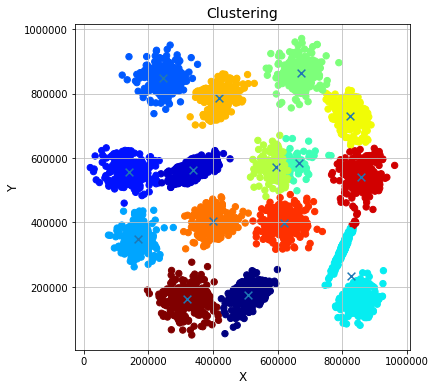

In [21]:
# ---------------------------------------------------------------------
# get points
x = points.map(lambda point: point[1]).collect()
y = points.map(lambda point: point[2]).collect()

# get cluster:
my_cluster = points.map(lambda point: (argmin((point[1], point[2]), centroids), point[1], point[2]))\
                   .map(lambda point: point[0])\
                   .collect()
# get centroid result
centroid_x = []
centroid_y = []
for point in centroids:
    centroid_x.append(point[0])
for point in centroids:
    centroid_y.append(point[1])
# ----------------------------------------------------------------------
# display function:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("Clustering",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')

ax.scatter(x, y, s = 40, c = my_cluster, marker = 'o', cmap = cm.jet )
ax.scatter(centroid_x, centroid_y, s = 60, marker = 'x', cmap = cm.jet )

plt.show()